In [1]:
#Importing Keras packages
from __future__ import print_function
import os
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from keras import optimizers
from tensorflow.keras.preprocessing import image
from keras.layers.advanced_activations import ELU, LeakyReLU, PReLU, Softmax, ReLU
from keras.regularizers import l2
from tensorflow.keras import initializers

Using TensorFlow backend.


['test1', 'train']


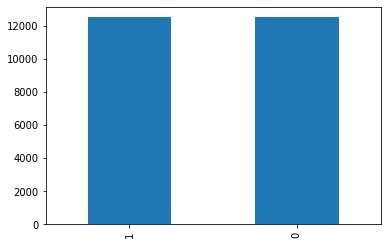

In [2]:
#Data Pre-processing and Inspection
import numpy as np
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print(os.listdir("C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\"))

image_width = 128
image_height = 128
image_size = (image_width, image_height)
image_channels = 3

input_shape = (image_width, image_height, image_channels)

filenames = os.listdir("C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\train\\")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df['category'].value_counts().plot.bar()

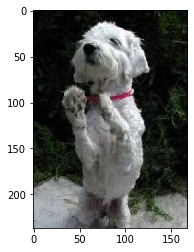

In [3]:
sample = random.choice(filenames)
image = load_img("C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\train\\"+sample)
plt.imshow(image)

In [4]:
#Ensuring the model is built on the existing GPU
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1
physical_devices------------- 1


In [5]:
#Initiating LiteNet for training
model = Sequential()

#1st Layer
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = input_shape, activation = 'elu',kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())

#2nd Layer
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())

#Pooling with Dropout
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.10))

#3rd Layer
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())

#4th Layer
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())

#Pooling with Dropout
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.10))

#5th Layer
model.add(Conv2D(256, (3, 3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())

#6th Layer
model.add(Conv2D(256, (3, 3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())

#Pooling with Dropout
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.10))

#7th Layer
model.add(Conv2D(512, (3, 3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())

#8th Layer
model.add(Conv2D(512, (3, 3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())

#Pooling with Dropout
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.15))

#9th Layer = 1st Fully Connected or Dense Layer
model.add(Flatten())
model.add(Dense(512, activation = 'elu', kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.15))

#10th Layer = 2nd Fully Connected or Dense Layer
model.add(Dense(512, activation = 'elu', kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.15))

#11th Layer = Final Layer
model.add(Dense(1, kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(Activation('sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)      

In [6]:
#Setting up training
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("C:\\Users\\Admin\\Desktop\\Research\\Results\\LiteNet Results\\CatsAndDogs_LiteNet_ELU_SGD.h5",
                             monitor = "val_loss",
                             mode = "min",
                             save_best_only = True,
                             verbose = 1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 8,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.5,
                              patience = 2,
                              verbose = 1,
                              min_delta = 0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(lr = 0.001, momentum = 0.9),
              metrics = ['accuracy'])

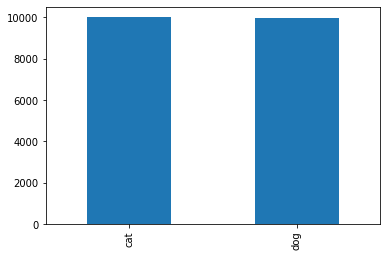

In [7]:
#Data distribution
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})
train_df, validate_df = train_test_split(df, test_size = 0.20, random_state = 42)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)
train_df['category'].value_counts().plot.bar()
validate_df['category'].value_counts().plot.bar()

In [8]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [9]:
batch_size = 32

In [10]:
#Data Augmentation setup
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\train\\", 
    x_col = 'filename',
    y_col = 'category',
    target_size = image_size,
    class_mode = 'binary',
    batch_size = batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [11]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\train\\", 
    x_col = 'filename',
    y_col = 'category',
    target_size = image_size,
    class_mode = 'binary',
    batch_size = batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [12]:
#Model testing
epochs = 20
history = model.fit_generator(
    train_generator, 
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_train//batch_size,
    callbacks = callbacks
)

loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers = 12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))
model.save_weights("C:\\Users\\Admin\\Desktop\\Research\\Results\\LiteNet Results\\Weights\\CatsAndDogs_LiteNet_ELU_SGD.h5")

Epoch 1/20
625/625 [==============================] - 107s 170ms/step - loss: 3.5601 - accuracy: 0.6750 - val_loss: 3.4878 - val_accuracy: 0.7057

Epoch 00001: val_loss improved from inf to 3.48778, saving model to C:\Users\Admin\Desktop\Research\Results\LiteNet Results\CatsAndDogs_LiteNet_ELU_SGD.h5
Epoch 2/20
625/625 [==============================] - 103s 165ms/step - loss: 3.4222 - accuracy: 0.7370 - val_loss: 3.4868 - val_accuracy: 0.7228

Epoch 00002: val_loss improved from 3.48778 to 3.48681, saving model to C:\Users\Admin\Desktop\Research\Results\LiteNet Results\CatsAndDogs_LiteNet_ELU_SGD.h5
Epoch 3/20
625/625 [==============================] - 103s 164ms/step - loss: 3.3519 - accuracy: 0.7605 - val_loss: 3.9437 - val_accuracy: 0.7303

Epoch 00003: val_loss did not improve from 3.48681
Epoch 4/20
625/625 [==============================] - 103s 164ms/step - loss: 3.2839 - accuracy: 0.7836 - val_loss: 3.1166 - val_accuracy: 0.7649

Epoch 00004: val_loss improved from 3.48681 to 

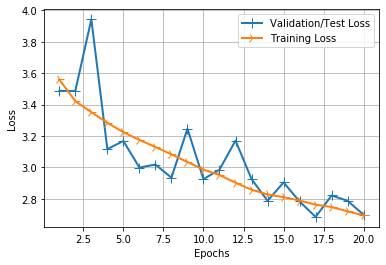

In [13]:
#Evaluating training and test error
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
#Model Testing
test_filenames = os.listdir("C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\test1\\")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [15]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\test1\\", 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = image_size,
    batch_size = batch_size,
    shuffle = False
)

Found 12500 validated image filenames.


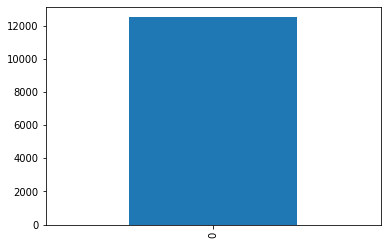

In [16]:
predict = model.predict_generator(test_generator, steps = np.ceil(nb_samples/batch_size))
test_df['category'] = np.argmax(predict, axis = 1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })
test_df['category'].value_counts().plot.bar()

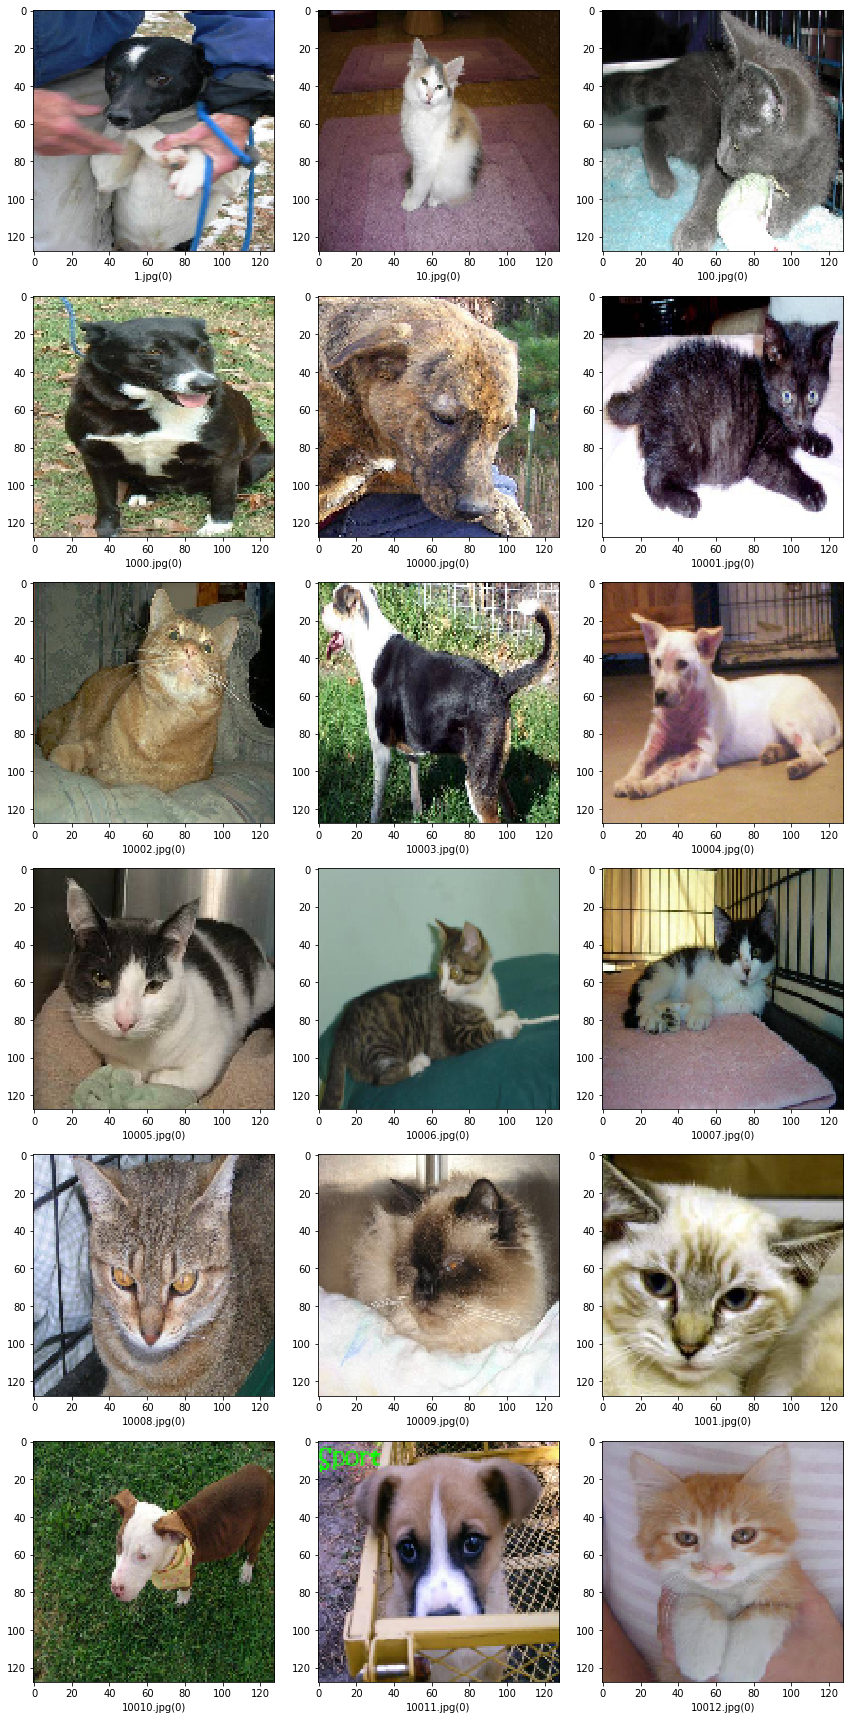

In [17]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize = (12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\test1\\"+filename, target_size = image_size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
predict = model.predict_generator(test_generator, steps = np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

In [ ]:
sample_test = test_df.sample(n = 9).reset_index()
sample_test.head()
plt.figure(figsize = (12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\test1\\"+filename, target_size = (128, 128))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [18]:
predicted_class_indices = np.argmax(predict,axis = 1)
len(predicted_class_indices)
predicted_class_indices[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
test_path_array = []

testpath = "C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\test1\\"
for file in os.listdir(testpath):
   
    test_path_array.append(os.path.join(testpath,file))

print(test_path_array[5])

dtest = {'path': test_path_array}
df_test = pd.DataFrame(data = dtest)
df_test.head()

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 12
ncols = 4

pic_index = 0 # Index for iterating over images
# Setting up matplotlib fig and size to fit 4x4 images
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

for i, img_path in enumerate(df_test.path[:48]):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(str(predicted_class_indices[i]))

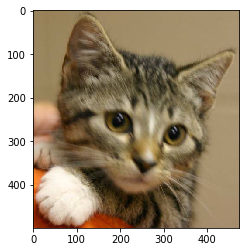

In [19]:
#Filter Visualisation setup
from keras.preprocessing import image
import matplotlib.pyplot as plt

input_image_path = 'C:\\Users\\Admin\\Desktop\\Research\\Datasets Used\\CatsVsDogs\\catsvsdogs_images\\test1\\156.jpg'

#Input Image for feature visualization
img1 = image.load_img(input_image_path)
plt.imshow(img1);

img_size = (128, 128)
#Load image into a 4D Tensor, convert it to a numpy array and expand to 4 dim's
img1 = image.load_img(input_image_path, target_size = img_size)
image_tensor = image.img_to_array(img1)
#print(image_tensor.shape)
image_tensor = image_tensor/255
image_tensor = np.expand_dims(image_tensor, axis = 0)
#print(img.shape)

In [20]:
from keras import models

#Extracts the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

#Create a model that returns these outputs given the model inputs
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

In [21]:
#Extract feature activations
activations = activation_model.predict(image_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 128, 128, 64)


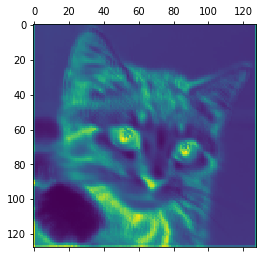

In [22]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


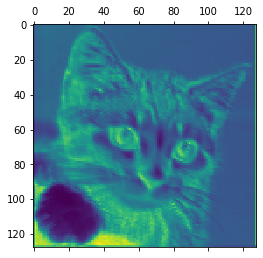

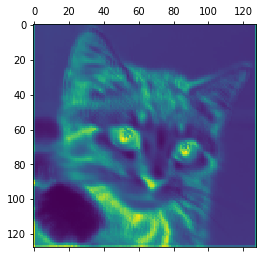

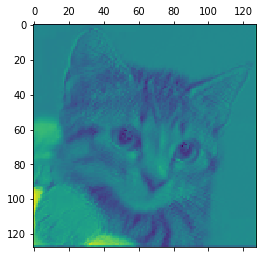

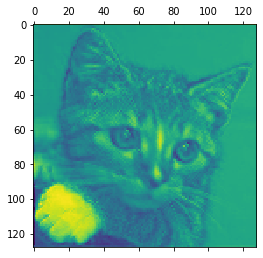

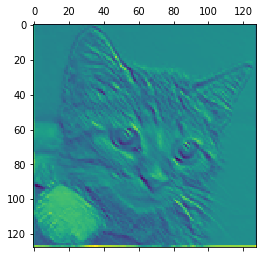

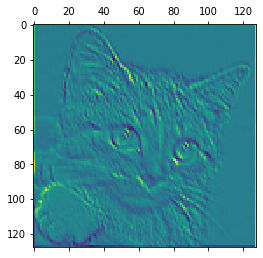

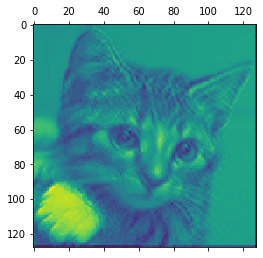

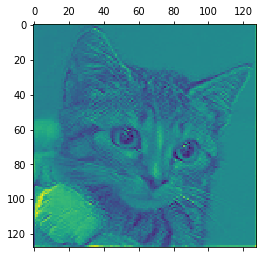

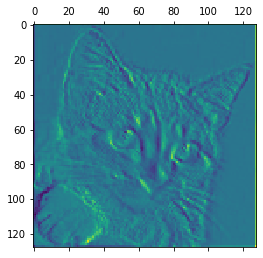

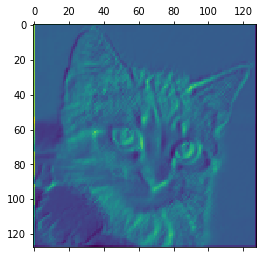

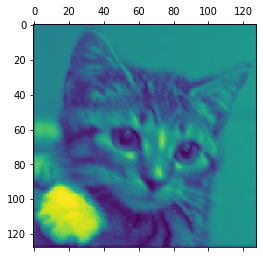

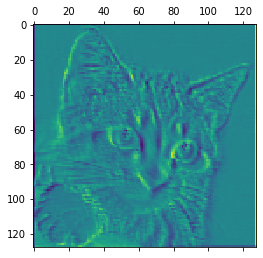

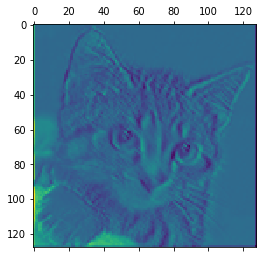

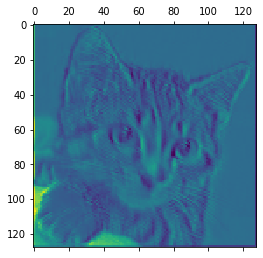

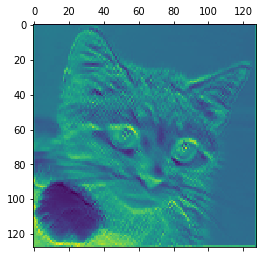

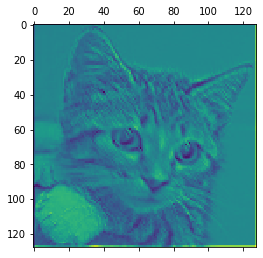

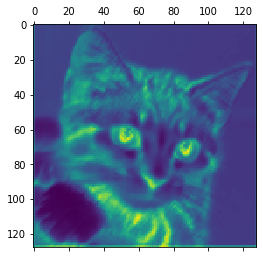

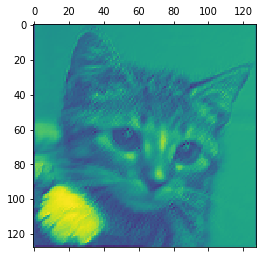

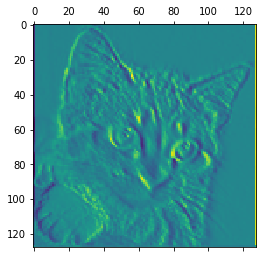

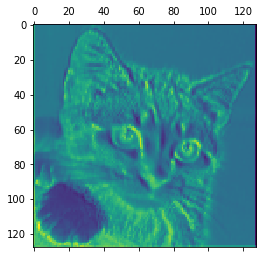

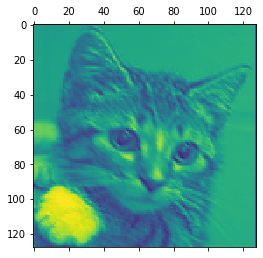

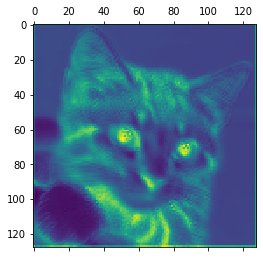

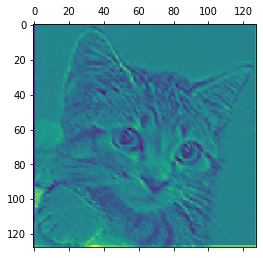

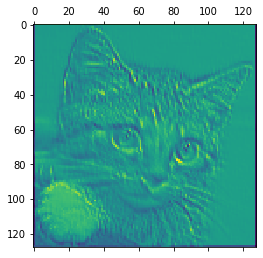

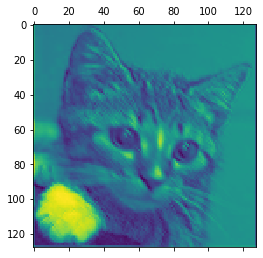

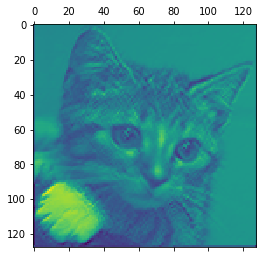

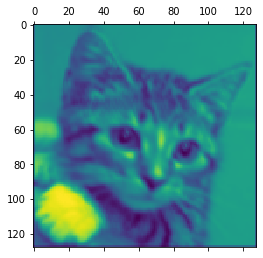

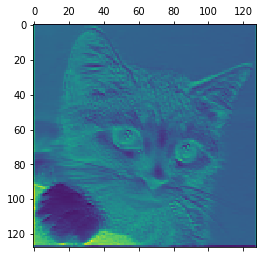

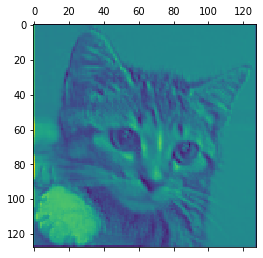

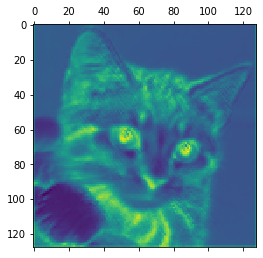

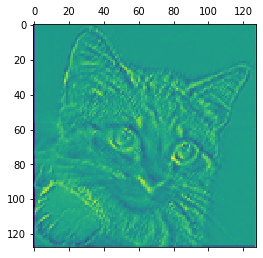

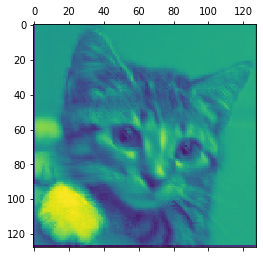

In [23]:
for i in range(0,32):
    plt.matshow(first_layer_activation[0, :, :,i], cmap = 'viridis')

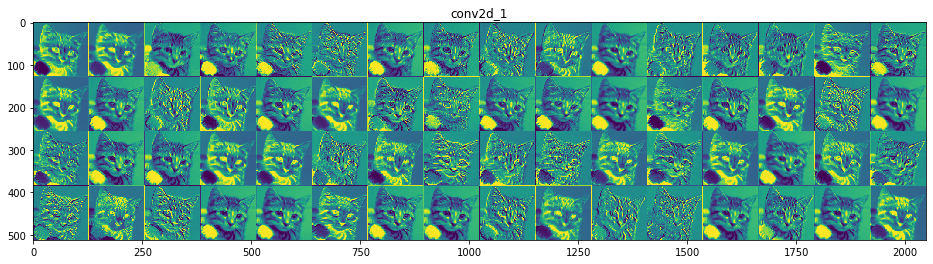

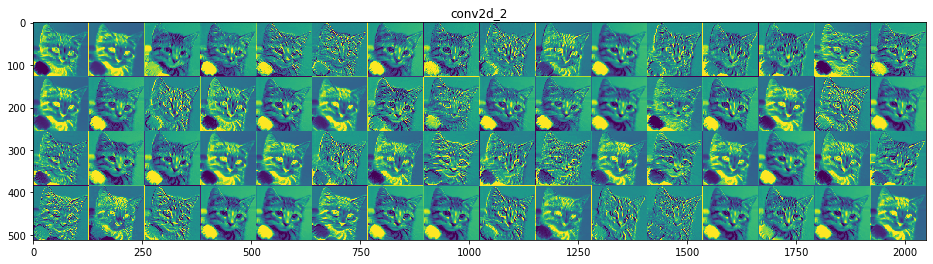

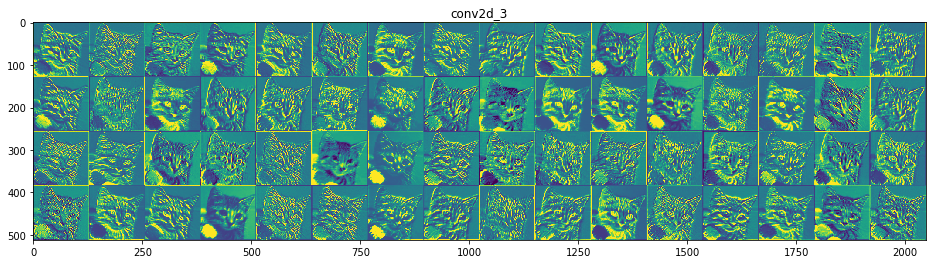

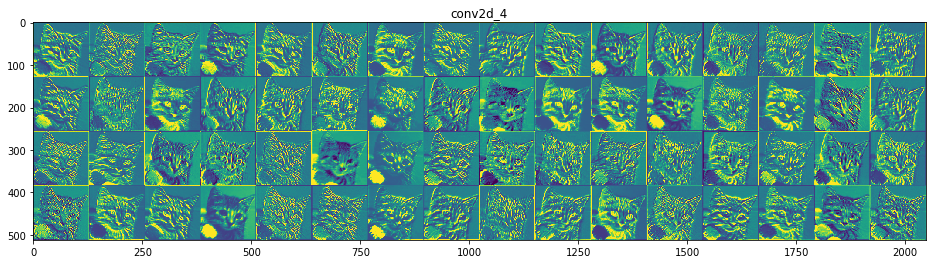

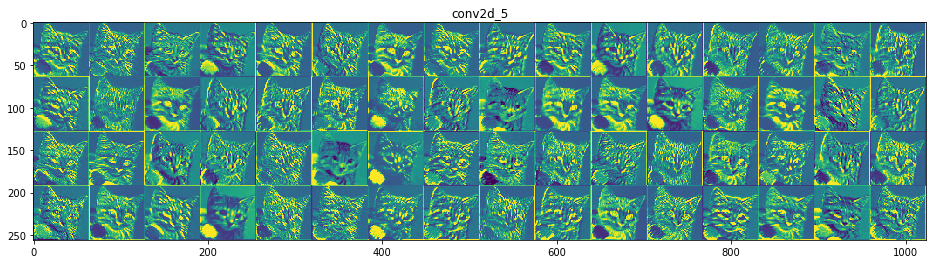

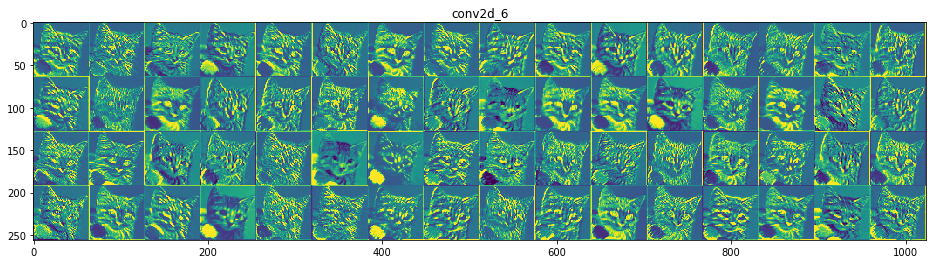

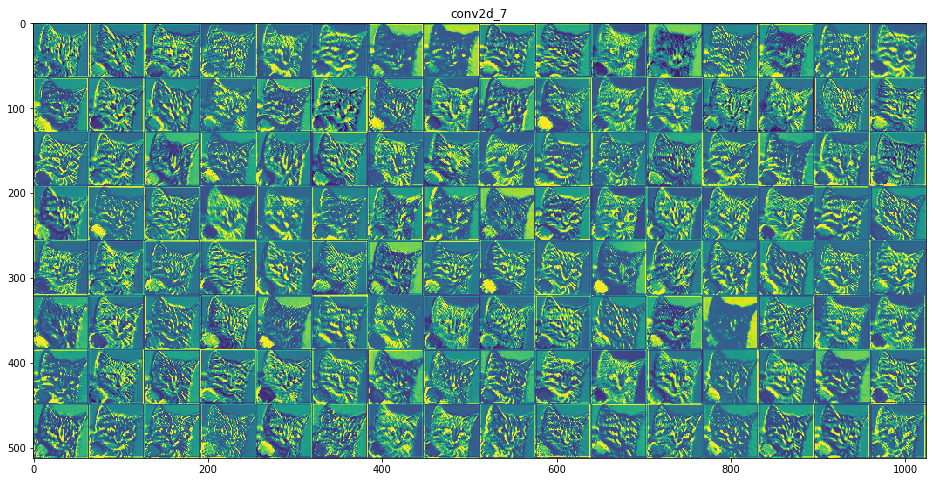

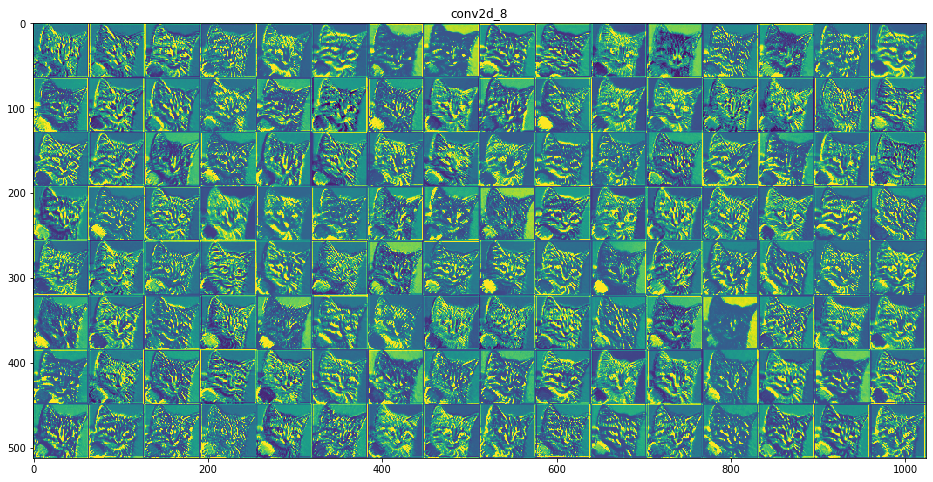

In [24]:
layer_names = []
for layer in model.layers[:21]:
    layer_names.append(layer.name)
images_per_row = 16

#Use convolutional layers only
conv_layer_names = []
for layer_name in layer_names:
    if 'conv2d' in layer_name:
        conv_layer_names.append(layer_name)

for layer_name, layer_activation in zip(conv_layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')